In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch


In [2]:
url = 'Walmart.csv'
df = pd.read_csv(url)
print(df.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


##Preprocessing

In [4]:
#convert date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Week'] = df['Date'].dt.isocalendar().week

In [5]:
#one  hot endcoding
store_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid multicollinearity
store_dummies = store_encoder.fit_transform(df[['Store']])
store_df = pd.DataFrame(store_dummies, columns=[f'Store_{int(i)}' for i in range(1, store_dummies.shape[1]+1)])
df = pd.concat([df, store_df], axis=1)
df.drop('Store', axis=1, inplace=True)

In [6]:
#scaling
scaler = StandardScaler()
continuous_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week']
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [7]:
df

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Store_1,Store_2,...,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44
0,2010-02-05,1643690.90,0,-0.995136,-1.713800,1.004175,0.056964,-1.473530,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-02-12,1641957.44,1,-1.201170,-1.766089,1.007880,0.056964,-1.402749,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-02-19,1611968.17,0,-1.124178,-1.840166,1.009074,0.056964,-1.331968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-02-26,1409727.59,0,-0.760907,-1.737766,1.009849,0.056964,-1.261187,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-03-05,1554806.68,0,-0.767955,-1.598328,1.010624,0.056964,-1.190406,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,0.228602,1.390883,0.519270,0.365109,0.933021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6431,2012-10-05,733455.07,0,0.229144,1.364738,0.523256,0.356046,1.003802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6432,2012-10-12,734464.36,0,-0.335825,1.397419,0.527241,0.356046,1.074583,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6433,2012-10-19,718125.53,0,-0.227385,1.329879,0.527332,0.356046,1.145364,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


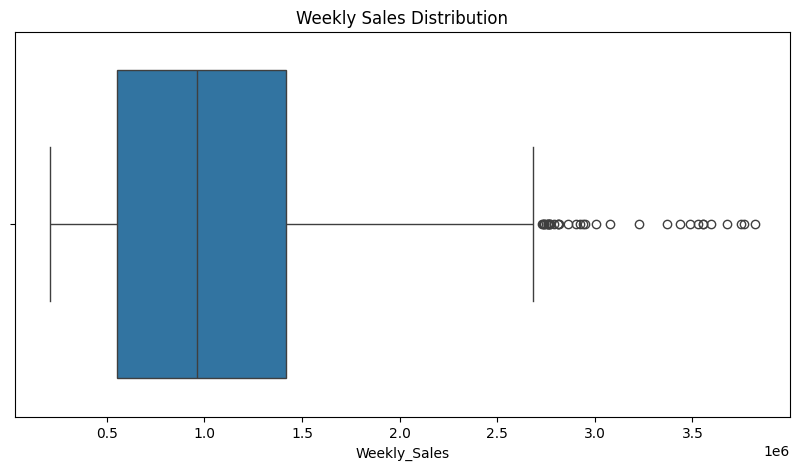

In [8]:
#outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Weekly_Sales'])
plt.title('Weekly Sales Distribution')
plt.show()

##Split in train and test set

In [9]:
# Target variable
y = df['Weekly_Sales']

# Features (all columns except Weekly_Sales and Date)
X = df.drop(['Weekly_Sales', 'Date'], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5148, 50)
X_test shape: (1287, 50)
y_train shape: (5148,)
y_test shape: (1287,)


##Multi linear regression

In [11]:
# Initialize the model
model = LinearRegression()

# Train on the training set
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

RMSE: 155596.63
MAE: 97154.44
R²: 0.9248


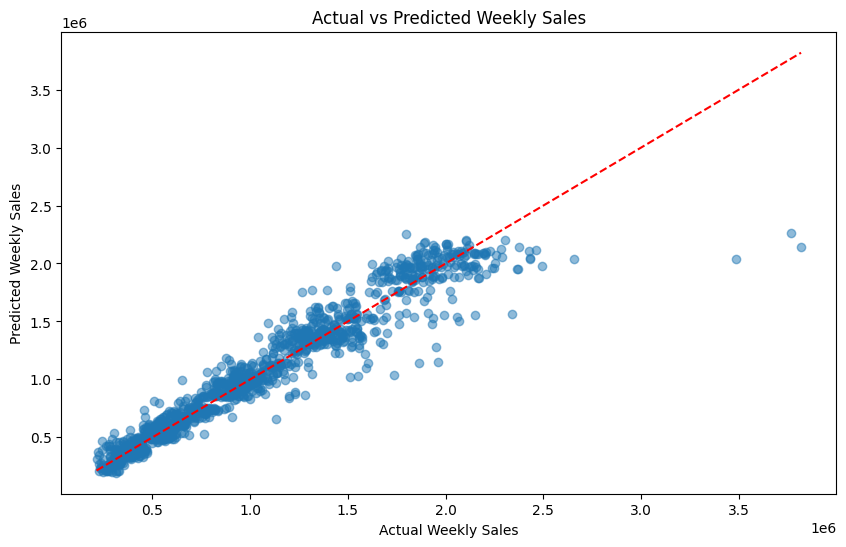

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.show()


In [14]:
coefficients = model.coef_
feature_names = X.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

         Feature   Coefficient
24      Store_19  5.300317e+05
8        Store_3  5.045561e+05
18      Store_13  4.452677e+05
17      Store_12  4.176901e+05
14       Store_9  3.686546e+05
6        Store_1  3.643793e+05
31      Store_26  2.302141e+05
5           Week  4.999020e+04
0   Holiday_Flag  3.782511e+04
3            CPI  2.266734e+03
10       Store_5 -4.595356e+02
2     Fuel_Price -5.686811e+03
1    Temperature -3.390770e+04
4   Unemployment -3.567883e+04
43      Store_38 -1.049016e+05
32      Store_27 -1.150664e+05
23      Store_18 -1.301507e+05
35      Store_30 -1.701281e+05
15      Store_10 -1.997156e+05
28      Store_23 -2.118520e+05
27      Store_22 -2.491621e+05
45      Store_40 -3.371361e+05
36      Store_31 -4.113329e+05
16      Store_11 -4.333743e+05
22      Store_17 -4.653476e+05
26      Store_21 -5.493526e+05
38      Store_33 -5.672772e+05
30      Store_25 -5.856760e+05
39      Store_34 -6.414518e+05
44      Store_39 -6.827772e+05
12       Store_7 -6.938465e+05
21      

##Applying the SVM model using SVR

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##CROSS VALIDATION TO FIND BEST PARAMETER

In [ ]:

param_linear = {
    'C': [1, 10, 50, 100, 300, 800, 1000]
}

grid_linear = GridSearchCV(
    SVR(kernel='linear'),
    param_linear,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_linear.fit(X_train_scaled, y_train)

print("\n🔹 Best Linear SVR Params:", grid_linear.best_params_)
print("🔹 Linear SVR Best RMSE:", np.sqrt(-grid_linear.best_score_))


param_poly = {
    'C': [100, 300, 800, 1200],
    'degree': [2, 3, 4, 5],
    'coef0': [0, 1, 2]
}

grid_poly = GridSearchCV(
    SVR(kernel='poly'),
    param_poly,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_poly.fit(X_train_scaled, y_train)

print("\n🔹 Best Polynomial SVR Params:", grid_poly.best_params_)
print("🔹 Polynomial SVR Best RMSE:", np.sqrt(-grid_poly.best_score_))

param_rbf = {
    'C': [10, 50, 100, 300, 800, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.05, 0.1, 0.2]
}

grid_rbf = GridSearchCV(
    SVR(kernel='rbf'),
    param_rbf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_rbf.fit(X_train_scaled, y_train)

print("\n🔹 Best RBF SVR Params:", grid_rbf.best_params_)
print("🔹 RBF SVR Best RMSE:", np.sqrt(-grid_rbf.best_score_))



🔹 Best Linear SVR Params: {'C': 1000}
🔹 Linear SVR Best RMSE: 177530.1511446754

🔹 Best Polynomial SVR Params: {'C': 1200, 'coef0': 2, 'degree': 5}
🔹 Polynomial SVR Best RMSE: 153586.14550512107

🔹 Best RBF SVR Params: {'C': 1000, 'epsilon': 0.01, 'gamma': 0.1}
🔹 RBF SVR Best RMSE: 531607.554707681


In [ ]:
# Linear kernel
svr_linear = svm.SVR(kernel='linear', C=1000)
svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)

# Polynomial kernel
svr_poly = svm.SVR(kernel='poly', degree=7, coef0=4, C=1500)
svr_poly.fit(X_train_scaled, y_train)
y_pred_poly = svr_poly.predict(X_test_scaled)

# RBF kernel
svr_rbf = svm.SVR(kernel='rbf', C=1500, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

In [ ]:
def evaluate_model(name, y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} SVR:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²:  {r2:.4f}\n")

evaluate_model("Linear", y_test, y_pred_linear)
evaluate_model("Polynomial", y_test, y_pred_poly)
evaluate_model("RBF", y_test, y_pred_rbf)

Linear SVR:
  RMSE: 30597403915.35
  MAE: 93831.26
  R²:  0.9050

Polynomial SVR:
  RMSE: 22855520049.25
  MAE: 73583.57
  R²:  0.9291

RBF SVR:
  RMSE: 255369971656.83
  MAE: 394902.86
  R²:  0.2073



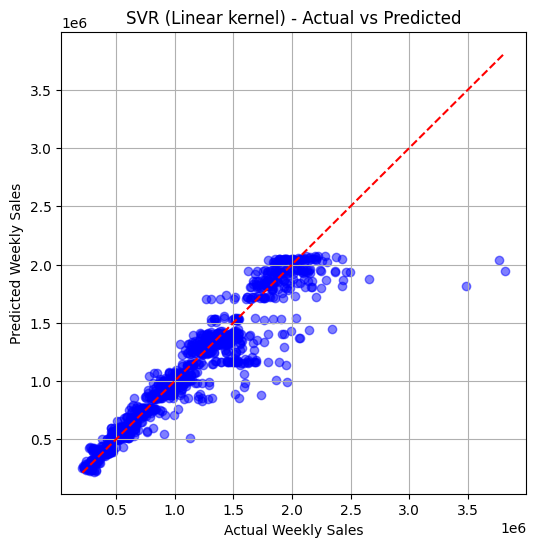

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("SVR (Poly kernel) - Actual vs Predicted")
plt.grid()
plt.show()

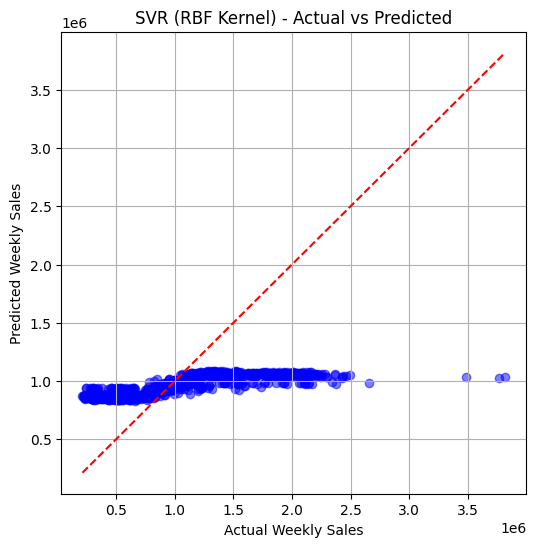

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rbf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("SVR (RBF Kernel) - Actual vs Predicted")
plt.grid()
plt.show()

##GRADIENT BOOST

In [16]:
X_train_final = X_train
X_test_final = X_test

##CROSS VALIDATION : To see what will be the best parameter value

In [ ]:

param_grid = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3, 4]
}

gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_final, y_train)

print("Best Parameters Found:")
print(grid_search.best_params_)

best_gbr = grid_search.best_estimator_


y_pred = best_gbr.predict(X_test_final)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nGradient Boost (Best Model) Results")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters Found:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

Gradient Boost (Best Model) Results
MSE:  10697337397.2348
RMSE: 103427.9334
MAE:  62051.3116
R²:   0.9668


In [17]:
gbr = GradientBoostingRegressor(
    n_estimators=600,      # number of trees
    learning_rate=0.2,    # smaller LR = better stability
    max_depth=5,           # depth of each tree
    random_state=42
)

gbr.fit(X_train_final, y_train)
y_pred = gbr.predict(X_test_final)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Gradient Boost Results")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

Gradient Boost Results
MSE:  9323988138.5062
RMSE: 96560.8002
R²:   0.9711


##Let try our test set to predict the weekly sale since gradient boost give a high accuracy

In [21]:
y_pred = gbr.predict(X_test)
print(y_pred[:10])

[1131342.05551244 1398508.12756483 1855227.93934911  999689.08454282
  416930.77133885  990380.01860558 1280177.53783811 1031673.13622562
 1975497.62357727 1012957.81486216]


In [22]:
for actual, pred in zip(y_test[:10], y_pred[:10]):
    print("Actual:", actual, " - Predicted:", pred)

Actual: 1138800.32  - Predicted: 1131342.0555124362
Actual: 1304850.67  - Predicted: 1398508.127564833
Actual: 1769296.25  - Predicted: 1855227.9393491086
Actual: 1077640.13  - Predicted: 999689.0845428224
Actual: 428851.99  - Predicted: 416930.7713388501
Actual: 1004523.59  - Predicted: 990380.0186055811
Actual: 1523410.71  - Predicted: 1280177.5378381081
Actual: 1014898.78  - Predicted: 1031673.1362256227
Actual: 1955896.59  - Predicted: 1975497.6235772711
Actual: 958667.23  - Predicted: 1012957.814862163


##Random forest

In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_samples=int(X_train.shape[0]*0.8),
                                   min_impurity_decrease=0.5,
                                   oob_score=True,
                                   random_state=202)

rf.fit(X_train, y_train)

RandomForestRegressor(max_samples=4118, min_impurity_decrease=0.5,
                      n_estimators=200, oob_score=True, random_state=202)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

Random Forest Regression Results:
RMSE: 129277.20
MAE: 65116.71
R²: 0.9481


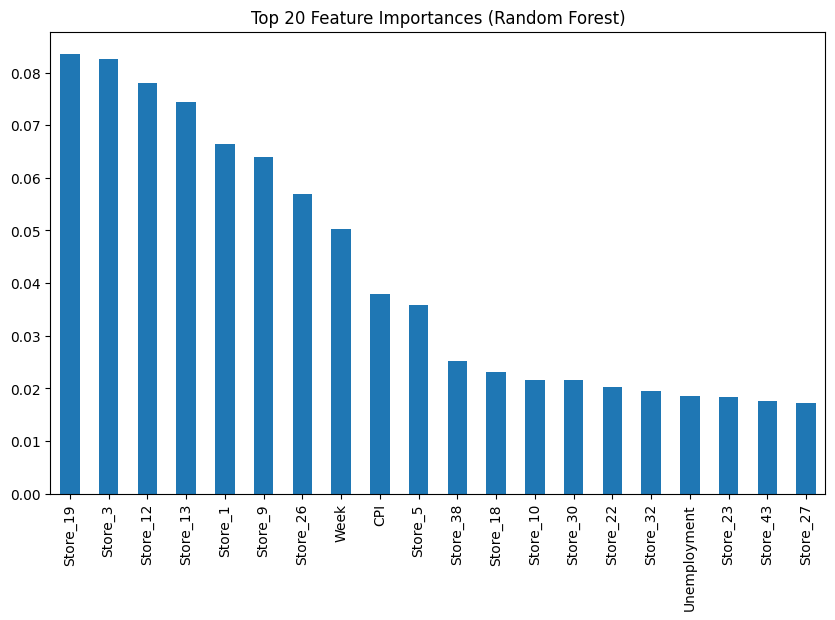

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_importances[:20].plot(kind='bar')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()

In [ ]:
feature_to_plot = 'Week'

# Create a dense grid of values for that feature
X_grid = np.arange(X_train[feature_to_plot].min(), X_train[feature_to_plot].max(), 0.01).reshape(-1,1)

# For other features, fix them to their mean values
X_vis = pd.DataFrame(np.tile(X_train.mean().values, (len(X_grid),1)), columns=X_train.columns)

# Replace the column we want to plot with the grid
X_vis[feature_to_plot] = X_grid


In [ ]:
y_pred_vis = rf.predict(X_vis)


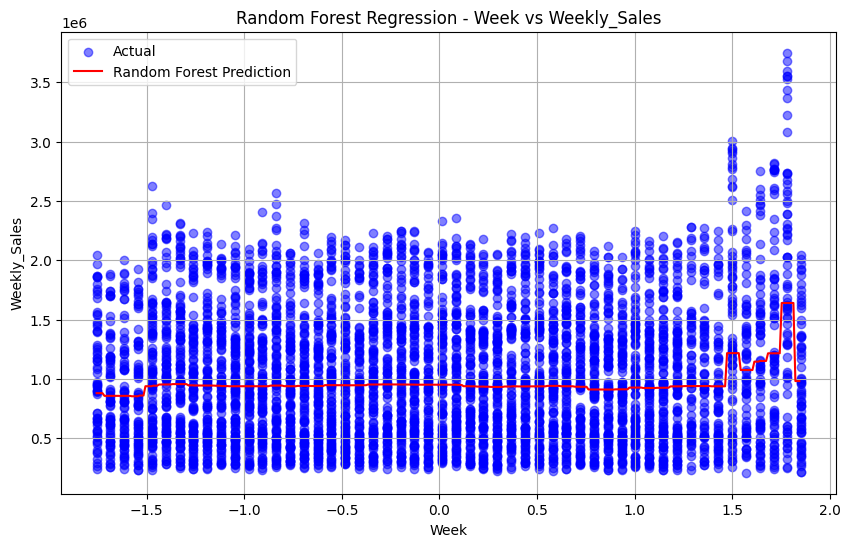

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_train[feature_to_plot], y_train, color='blue', alpha=0.5, label='Actual')
plt.plot(X_grid, y_pred_vis, color='red', label='Random Forest Prediction')
plt.xlabel(feature_to_plot)
plt.ylabel('Weekly_Sales')
plt.title(f'Random Forest Regression - {feature_to_plot} vs Weekly_Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score:.2f}')

Out-of-Bag Score: 0.95


##Decission tree


In [ ]:
X = df.drop(['Weekly_Sales','Date'], axis=1).values
y = df['Weekly_Sales'].values
kf = KFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeRegressor(
    criterion="squared_error",
    min_samples_leaf=10,
    max_depth=10,
    random_state=42
)

scores_dt = cross_val_score(dt, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_dt = np.sqrt(-scores_dt)

print("Decision Tree RMSE for each fold:", rmse_dt)
print("Mean RMSE:", rmse_dt.mean())

Decision Tree RMSE for each fold: [361496.83311807 365831.57912028 353452.30913849 357407.46681971
 345770.34302716]
Mean RMSE: 356791.7062447409


## Neurol network MLP(relu)+Adam(optimizer)






In [ ]:
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32)

X_test_t  = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t  = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32)

# DataLoader
train_dl = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)

In [ ]:
class MLP2(nn.Module):
    def __init__(self, num_features, n_hidden1, n_hidden2):
        super(MLP2, self).__init__()

        self.linear1 = nn.Linear(num_features, n_hidden1)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out


In [ ]:
num_features = X_train.shape[1]
n_hidden1 = 32
n_hidden2 = 8
lr = 0.001
n_epoch = 50

model = MLP2(num_features, n_hidden1, n_hidden2)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lossfunc = nn.MSELoss()


In [ ]:
train_loss = []
test_loss = []

for epoch in range(n_epoch):
    model.train()

    for x_batch, y_batch in train_dl:
        y_pred = model(x_batch)
        loss = lossfunc(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss.append(loss.item())

    # ----- TEST LOSS -----
    model.eval()
    with torch.inference_mode():
        y_test_pred = model(X_test_t)
        loss_test = lossfunc(y_test_pred, y_test_t)
        test_loss.append(loss_test.item())

    print(f"Epoch {epoch+1}/{n_epoch} | Train Loss: {loss.item():.4f} | Test Loss: {loss_test.item():.4f}")


Epoch 1/50 | Train Loss: 809181577216.0000 | Test Loss: 1434838106112.0000
Epoch 2/50 | Train Loss: 1416734310400.0000 | Test Loss: 1434832076800.0000
Epoch 3/50 | Train Loss: 1199230025728.0000 | Test Loss: 1434809139200.0000
Epoch 4/50 | Train Loss: 1571231367168.0000 | Test Loss: 1434756055040.0000
Epoch 5/50 | Train Loss: 1698796666880.0000 | Test Loss: 1434662207488.0000
Epoch 6/50 | Train Loss: 924579594240.0000 | Test Loss: 1434518290432.0000
Epoch 7/50 | Train Loss: 1199642116096.0000 | Test Loss: 1434316177408.0000
Epoch 8/50 | Train Loss: 1649187749888.0000 | Test Loss: 1434048790528.0000
Epoch 9/50 | Train Loss: 1041176657920.0000 | Test Loss: 1433707610112.0000
Epoch 10/50 | Train Loss: 1303724687360.0000 | Test Loss: 1433286868992.0000
Epoch 11/50 | Train Loss: 1022686593024.0000 | Test Loss: 1432781979648.0000
Epoch 12/50 | Train Loss: 1343889997824.0000 | Test Loss: 1432187699200.0000
Epoch 13/50 | Train Loss: 1148298854400.0000 | Test Loss: 1431497211904.0000
Epoch 14/5

In [ ]:
y_pred_final = model(X_test_t).detach().numpy()

rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)

print("\nNeural Network Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")



Neural Network Results:
RMSE: 1148781.5460
MAE:  999378.2415
R²:   -3.0965


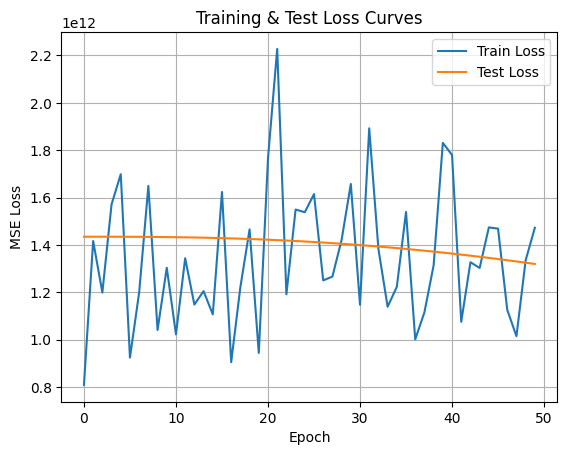

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training & Test Loss Curves")
plt.legend()
plt.grid(True)
plt.show()

##Dim reduction(PCA) + Neurol network MLP(relu)+Adam(optimizer)


In [ ]:
pca_8 = PCA(n_components=8)
X_train_8 = pca_8.fit_transform(X_train)
X_test_8 = pca_8.transform(X_test)

# ---  PCA 8 -> 3 ---
pca_3 = PCA(n_components=3)
X_train_3 = pca_3.fit_transform(X_train_8)
X_test_3 = pca_3.transform(X_test_8)

Epoch 1/50 | Train Loss: 1597801889792.0000 | Test Loss: 1434838237184.0000
Epoch 2/50 | Train Loss: 1367668293632.0000 | Test Loss: 1434834042880.0000
Epoch 3/50 | Train Loss: 1707518197760.0000 | Test Loss: 1434823426048.0000
Epoch 4/50 | Train Loss: 1880983732224.0000 | Test Loss: 1434800750592.0000
Epoch 5/50 | Train Loss: 1165136887808.0000 | Test Loss: 1434760642560.0000
Epoch 6/50 | Train Loss: 1502627627008.0000 | Test Loss: 1434698514432.0000
Epoch 7/50 | Train Loss: 1262438318080.0000 | Test Loss: 1434610827264.0000
Epoch 8/50 | Train Loss: 1530845855744.0000 | Test Loss: 1434494173184.0000
Epoch 9/50 | Train Loss: 1224133967872.0000 | Test Loss: 1434345799680.0000
Epoch 10/50 | Train Loss: 1658638434304.0000 | Test Loss: 1434162823168.0000
Epoch 11/50 | Train Loss: 1636741283840.0000 | Test Loss: 1433942753280.0000
Epoch 12/50 | Train Loss: 1783496310784.0000 | Test Loss: 1433682837504.0000
Epoch 13/50 | Train Loss: 1351539884032.0000 | Test Loss: 1433381634048.0000
Epoch 14

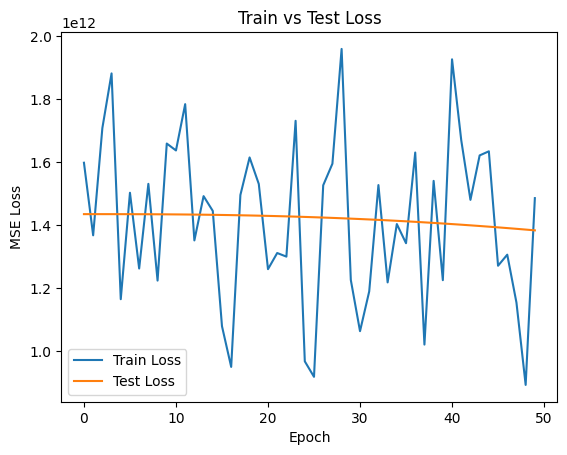

In [ ]:
X_train_t = torch.tensor(X_train_3, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32)
X_test_t = torch.tensor(X_test_3, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32)

train_dl = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)


class MLP3(nn.Module):
    def __init__(self, input_size, h1=16, h2=8):
        super(MLP3, self).__init__()
        self.linear1 = nn.Linear(input_size, h1)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(h1, h2)
        self.linear3 = nn.Linear(h2, 1)

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

model = MLP3(input_size=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lossfunc = nn.MSELoss()

# --- Training loop ---
n_epochs = 50
train_loss = []
test_loss = []

for epoch in range(n_epochs):
    model.train()
    for xb, yb in train_dl:
        optimizer.zero_grad()
        pred = model(xb)
        loss = lossfunc(pred, yb)
        loss.backward()
        optimizer.step()

    train_loss.append(loss.item())

    model.eval()
    with torch.inference_mode():
        y_pred_test = model(X_test_t)
        loss_test = lossfunc(y_pred_test, y_test_t)
        test_loss.append(loss_test.item())

    print(f"Epoch {epoch+1}/{n_epochs} | Train Loss: {loss.item():.4f} | Test Loss: {loss_test.item():.4f}")

# ---  Evaluate ---
y_pred_final = y_pred_test.detach().numpy()
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)

print("\nNeural Network Results (3 PCA features):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")

# --- : Loss plot ---
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Train vs Test Loss")
plt.legend()
plt.show()


##Here the models doesnt give us a good output(R²: -3.2640).
Lets try again by reducing only  the continuous features like : Temperature,CPI, Fuel_price etc...
and keep stores since after the one hot encodint all the stores became categories

Epoch 10/100 | Train Loss: 1737251225600.00 | Test Loss: 1431000580096.00
Epoch 20/100 | Train Loss: 1170663145472.00 | Test Loss: 1407835832320.00
Epoch 30/100 | Train Loss: 786305122304.00 | Test Loss: 1357093404672.00
Epoch 40/100 | Train Loss: 747384209408.00 | Test Loss: 1277459300352.00
Epoch 50/100 | Train Loss: 878767636480.00 | Test Loss: 1171551289344.00
Epoch 60/100 | Train Loss: 822112288768.00 | Test Loss: 1044770848768.00
Epoch 70/100 | Train Loss: 722652692480.00 | Test Loss: 904696430592.00
Epoch 80/100 | Train Loss: 627772293120.00 | Test Loss: 760488132608.00
Epoch 90/100 | Train Loss: 754712969216.00 | Test Loss: 621107871744.00
Epoch 100/100 | Train Loss: 315332231168.00 | Test Loss: 494716026880.00

Neural Network Results:
RMSE: 703360.48
MAE:  523717.15
R²:   -0.5356


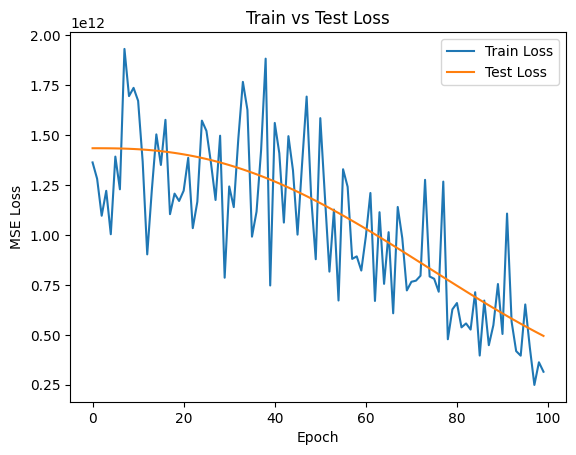

In [ ]:

continuous_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week']

scaler = StandardScaler()
X_train_cont_scaled = scaler.fit_transform(X_train[continuous_features])
X_test_cont_scaled = scaler.transform(X_test[continuous_features])

pca = PCA(n_components=3)  # Reduce to 3 features
X_train_cont_pca = pca.fit_transform(X_train_cont_scaled)
X_test_cont_pca = pca.transform(X_test_cont_scaled)


#  Keep store dummies as-is
store_cols = [col for col in X_train.columns if 'Store_' in col]
X_train_final = np.concatenate([X_train_cont_pca, X_train[store_cols].values], axis=1)
X_test_final = np.concatenate([X_test_cont_pca, X_test[store_cols].values], axis=1)


#  Convert to PyTorch tensors
X_train_t = torch.tensor(X_train_final, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32)
X_test_t = torch.tensor(X_test_final, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32)

train_dl = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)

#  Define MLP

class MLP_Walmart(nn.Module):
    def __init__(self, input_size, h1=32, h2=16):
        super(MLP_Walmart, self).__init__()
        self.linear1 = nn.Linear(input_size, h1)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(h1, h2)
        self.linear3 = nn.Linear(h2, 1)

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return x

model = MLP_Walmart(input_size=X_train_final.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lossfunc = nn.MSELoss()

#  Training loop
n_epochs = 100
train_loss = []
test_loss = []

for epoch in range(n_epochs):
    model.train()
    for xb, yb in train_dl:
        optimizer.zero_grad()
        pred = model(xb)
        loss = lossfunc(pred, yb)
        loss.backward()
        optimizer.step()

    train_loss.append(loss.item())

    model.eval()
    with torch.inference_mode():
        y_pred_test = model(X_test_t)
        loss_test = lossfunc(y_pred_test, y_test_t)
        test_loss.append(loss_test.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs} | Train Loss: {loss.item():.2f} | Test Loss: {loss_test.item():.2f}")

#  Evaluation
y_pred_final = y_pred_test.detach().numpy()
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
mae = mean_absolute_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)

print("\nNeural Network Results:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")

#  Loss plot

plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Train vs Test Loss")
plt.legend()
plt.show()


##R2 is better in this case R²:   -0.2118
But still not significant.
